# Face Recognition

In [1]:
# set up pose recognizer network

from conx import *

net = Network("Pose recognizer")

conx, version 3.4.3
Using Theano backend.


In [2]:
# uncomment one of the following lines:

datafile = 'cmu_faces_full_size'
#datafile = 'cmu_faces_half_size'
#datafile = 'cmu_faces_quarter_size'

net.dataset.get(datafile)
net.dataset.split(0.40)  # use 40% of the dataset for validation
net.dataset.shuffle()
net.dataset.summary()

Input Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : [(120, 128)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : [(4,)]
   range  : (0, 1)


In [3]:
net.dataset.inputs.shape

[(120, 128)]

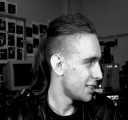

In [4]:
array2image(net.dataset.inputs[0])

In [5]:
net.dataset.targets[0]

[0, 0, 0, 1]

In [6]:
net.add(Layer('input', net.dataset.inputs.shape[0]))
net.add(FlattenLayer("flatten"))
net.add(Layer('hidden', 3, activation='sigmoid'))
net.add(Layer('output', 4, activation='sigmoid'))
net.connect()
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.1))

In [8]:
net["output"].colormap = "Greys_r"
net["output"].minmax = (0, 1)

In [9]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'flatten', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', index=20, options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value='Greys_r'), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPb29ufn59fX18fHx1dXV4eHhwYGBmdnZ3d3d7e3txYWFiYmJkZGRpeXl6ampjc3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [10]:
net.reset()
net.evaluate()

{'acc': 0.0,
 'loss': 0.23963996656735739,
 'val_acc': 0.0,
 'val_loss': 0.23864392912292098}

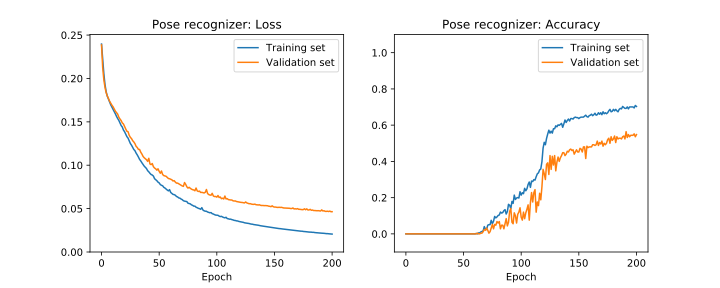

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  200 |   0.02065 |   0.70321 |   0.04646 |   0.54800 


In [11]:
net.train(200, accuracy=1.0, tolerance=0.25, report_rate=5, plot='notebook')

In [12]:
net.train(10, accuracy=1.0, tolerance=0.25, report_rate=3)

Evaluating initial validation metrics...
Training...
       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  200 |   0.02065 |   0.70321 |   0.04656 |   0.55020 
#  203 |   0.02035 |   0.70856 |   0.04617 |   0.54800 
#  206 |   0.02003 |   0.71658 |   0.04647 |   0.57200 
#  209 |   0.01976 |   0.78075 |   0.04635 |   0.60400 
#  210 |   0.01965 |   0.77005 |   0.04562 |   0.61200 


In [13]:
net.train(10, accuracy=1.0, tolerance=0.25, report_rate=5)

Evaluating initial validation metrics...
Training...
       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  210 |   0.01965 |   0.77005 |   0.04571 |   0.61446 
#  215 |   0.01918 |   0.81016 |   0.04547 |   0.63600 
#  220 |   0.01874 |   0.83690 |   0.04506 |   0.67200 
#  220 |   0.01874 |   0.83690 |   0.04506 |   0.67200 


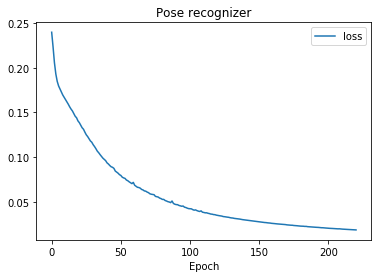

In [14]:
net.plot()

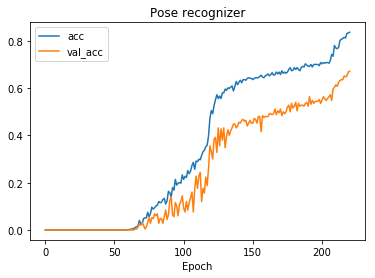

In [15]:
net.plot(['acc', 'val_acc'])

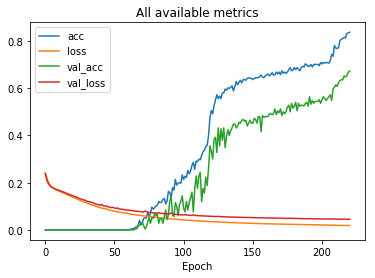

In [16]:
net.plot(net.get_metrics(), title="All available metrics")

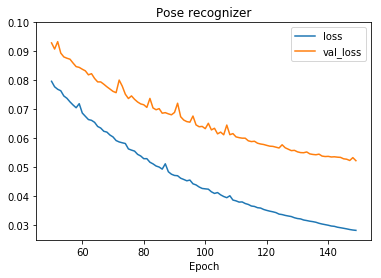

In [17]:
net.plot(['loss', 'val_loss'], ymax=0.1, start=50, end=150)

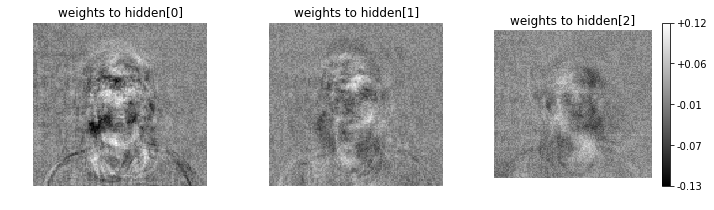

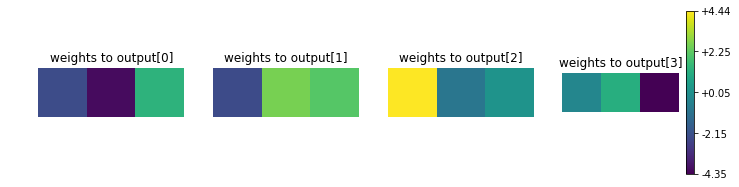

In [18]:
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0])
net.plot_layer_weights('output', cmap='viridis')

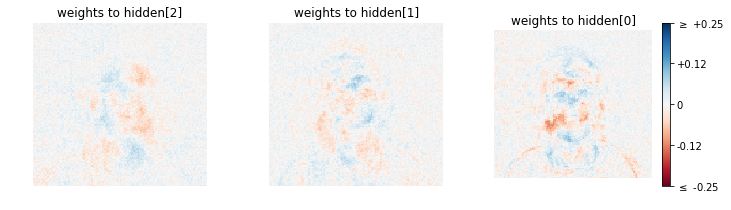

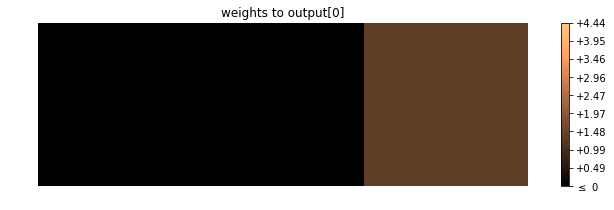

In [19]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0], 
                       units=(2,1,0), cmap="RdBu", wrange=(-0.25, 0.25))
net.plot_layer_weights('output', units=0, wmin=0, cmap="copper", ticks=10)

In [20]:
net.show_unit_weights('output', 0)

-2.29 -4.08  1.34 
